In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [85]:
df=pd.read_csv('/content/drive/MyDrive/income_classification.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [86]:
ndf=df.copy()

Checking for null values


In [87]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Label Encoding the Object DataTypes

In [89]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [90]:
obj= [' workclass', ' education', ' marital-status', ' occupation',' relationship',' race',' sex',' native-country',' income']
for i in obj:
    df[i] = df[i].astype('|S')
    df[i] = label_encoder.fit_transform(df[i])

In [91]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


Variance Inflation Factor to determine Multicollinearity
(Higher the value more will be the standard deviation)


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.521265,age
1,8.475260,workclass
2,4.031573,fnlwgt
3,9.210325,education
4,18.379729,education-num
5,3.976179,marital-status
6,3.710596,occupation
7,2.612286,relationship
8,17.578379,race
9,4.441675,sex


In [93]:
#drop columns which have VIF more than 10
df = df.drop([' education-num',' race',' hours-per-week',' native-country'], axis=1)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,9,4,1,1,1,2174,0,0
1,50,6,83311,9,2,4,0,1,0,0,0
2,38,4,215646,11,0,6,1,1,0,0,0
3,53,4,234721,1,2,6,0,1,0,0,0
4,28,4,338409,9,2,10,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,2,13,5,0,0,0,0
32557,40,4,154374,11,2,7,0,1,0,0,1
32558,58,4,151910,11,6,1,4,0,0,0,0
32559,22,4,201490,11,4,1,3,1,0,0,0


In [94]:
# removing all outliners using Z-score values
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,9,4,1,1,1,2174,0,0
1,50,6,83311,9,2,4,0,1,0,0,0
2,38,4,215646,11,0,6,1,1,0,0,0
3,53,4,234721,1,2,6,0,1,0,0,0
4,28,4,338409,9,2,10,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,2,13,5,0,0,0,0
32557,40,4,154374,11,2,7,0,1,0,0,1
32558,58,4,151910,11,6,1,4,0,0,0,0
32559,22,4,201490,11,4,1,3,1,0,0,0


Correlation matrix in form of heatmap

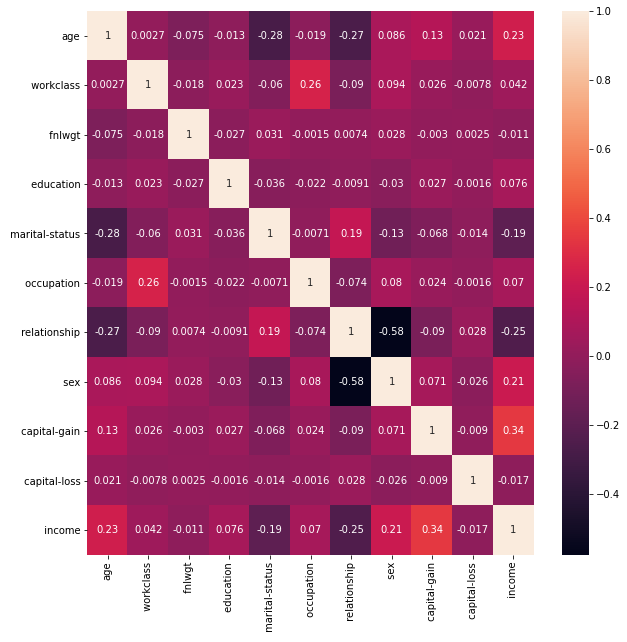

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True , cbar=True)

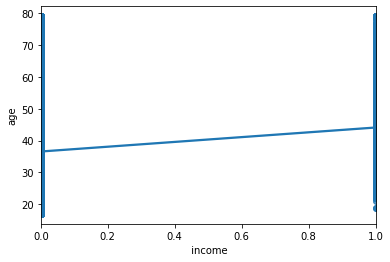

In [96]:
sns.regplot(x=df[' income'],y=df['age'])

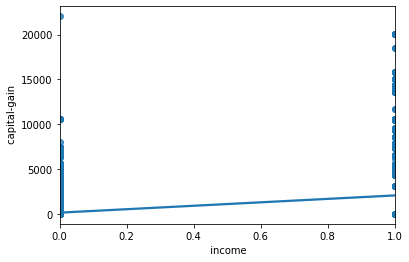

In [97]:
sns.regplot(x=df[' income'],y=df[' capital-gain'])

Splitting the data set


In [98]:
from sklearn.model_selection import train_test_split
val= df.values
X,y = val[:,:-1], val[:,-1]         #(X= features, y= label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Model

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, random_state=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Prediction

In [100]:
y_pred =rfc.predict(X_test)

In [101]:
#confusion matrix to see the validity of the model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4385,  351],
       [ 565,  785]])

Accuracy of the model

In [103]:
from sklearn.metrics import roc_auc_score
ras=roc_auc_score(y_test, y_pred) #accuracy score
ras=ras*100
print(("Accuracy score: {z:.2f} %").format(z=ras))

Accuracy score: 75.37 %
